<div><center><img src="https://ml.ucv.ai/logo.png\" width=150"/> </center></div>

# Tarea 1 - Material suplementario

## Tópicos en Inteligencia Artificial


* Alumno: RAFAEL CONTRERAS
* Cédula: 30391915
----


Justificar **todas** sus respuestas.

Si utilizó una referencia, coloque link (de ser online) o nombre de trabajo, autor/es y página (de ser una referencia escrita de libro o paper).
- De ser para la sección teórica, debe reescribir o parafrasear con sus propias palabras la sección que desea usar y porqué la usó en la pregunta.
- De ser para la sección práctica, comente lo más posible el código usado de un tercero.



# Preguntas teóricas

## 1.1

Considere el siguiente código escrito en PyTorch

In [1]:
import torch
import torch.nn as nn


class ModeloSimple(nn.Module):
    def __init__(
        self,
        input,
        hidden,
        out,
        actfn = nn.ReLU
    ):
        super(ModeloSimple, self).__init__()
        self.fc1 = nn.Linear(
            in_features=input,
            out_features=hidden
        )
        self.actfn = actfn
        self.fc2 = nn.Linear(
            in_features=hidden,
            out_features=out
        )

    def forward(self, x):
        x = self.fc1(x)
        x = self.actfn(x)
        x = self.fc2(x)
        return x

Modifique el código y substituya las variables y, w, y z por las variables de entrada, salida y capas ocultas. Además, agregue la opción de usar como función de activación además de la presentada la tangente hiperbólica.

## 1.2

Supongamos que modificamos la función de activación $f_i$ en las neuronas de la capa oculta de una red neuronal a la siguiente expresión:

$$f_i(x, y) = a_i x + b_i y + c_i \text{ con } i \in \{1,2, 3\}$$

La estructura de la red tiene 2 capas de entrada 1 capa oculta con 3 neuronas y 1 salida.

1. Escriba el diagrama de la red.
1. Qué particularidad tiene la función resultante?

### 1.2.a Respuesta


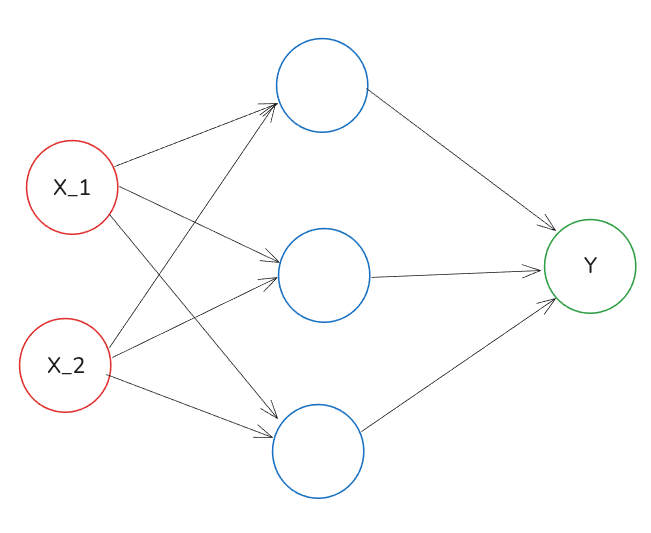

### 1.2.b Respuesta

La funcion resultante de la red neuronal es una funcion lineal. Sin "codos". Esto es debido a que la funcion de activacion nueva es lineal.

## Pregunta 2 de evaluaciones

Considere la siguiente superficie $$
f(x, y)=\frac{\sin \left(0.8 \left(x^2+y^2\right)\right)}{\left(x^2+y^2\right)^{0.9}}
$$

In [2]:
import matplotlib.pyplot as plt
import torch
import matplotlib.cm as cm
import copy
import time

### Implemente la función usando `torch.sin` disponible en [PyTorch - Sin](https://pytorch.org/docs/stable/generated/torch.sin.html)




In [3]:
def f(x, y):
    return torch.sin(0.8 * (x*x + y*y)) / (x*x + y*y) ** 0.9

### Parámetros de generación de datos

In [4]:
ruido = 0
mesh_dim = 40

### Funciones para generar los datos

In [5]:
def datos(ruido, mesh_dim):
  t = torch.linspace(-3, 3, mesh_dim)
  x, y = torch.meshgrid(t, t)
  z = f(x, y)
  z_noisy = z + ruido * torch.randn(mesh_dim, mesh_dim)

  return x, y, z, z_noisy

def dataset(x, y, z, z_noisy):
  x_train = torch.vstack([x.ravel(), y.ravel()]).T
  y_train = z_noisy.ravel()
  y_test = z.ravel()

  return x_train, y_train, y_test

def plot_surface(x, y, z_noisy):
  fig = plt.figure()
  ax = plt.axes(projection='3d')
  ax.plot_surface(x, y, z_noisy,cmap='viridis', edgecolor='none')
  ax.set_title('Superficie')
  plt.show()


In [6]:
x, y, z, z_ruido = datos(ruido, mesh_dim)

/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


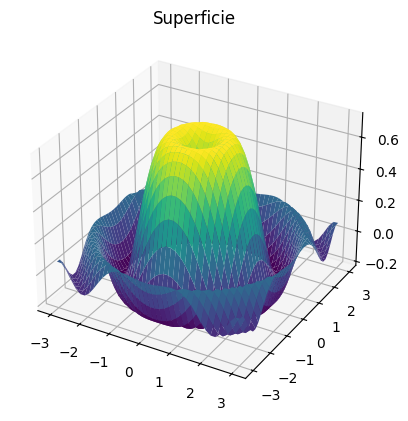

In [7]:
plot_surface(x, y, z_ruido)

In [8]:
x_train, y_train, y_test = dataset(x, y, z, z_ruido)

### Definiendo el modelo

La siguiente clase intenta definir una arquitectura de red neuronal que debe aproximar a $f(x, y)$. Identifique las dimensiones (entrada, salida) de la red sin importar la arquitectura.

Respuesta:

Se provee la estructura principal de la clase debe crear la arquitectura en el método `__init__` de tal manera de que tenga 3 capas lineales con dimensiones de entrada `neuronas_l1`, `neuronas_l2` y `neuronas_l3`. La función de activación debe ser la `ReLU` para todas las capas.

In [9]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

In [10]:
class Net3L(nn.Module):
    def __init__(self, neuronas_l1=10, neuronas_l2=10, neuronas_l3=10):
        super(Net3L, self).__init__()
        ##############################################
        #         Agregue red neuronal acá           #
        ##############################################
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2,neuronas_l1),
            nn.ReLU(),
            nn.Linear(neuronas_l1,neuronas_l2),
            nn.ReLU(),
            nn.Linear(neuronas_l2,neuronas_l3),
            nn.ReLU(),
            nn.Linear(neuronas_l3,1)
        )
        ##############################################
    def forward(self, x):
        return self.linear_relu_stack(x)

    def fit(self, x_train, y_train, optimizer, batch_size, n_epochs_max):
        # Crear el TensorDataset
        train_data = TensorDataset(x_train, y_train)

        # Crear el Data Loader
        train_loader = DataLoader(
            dataset=train_data, # 3
            batch_size=batch_size,
            shuffle= True # 4
        )

        # Creando el loop de entrenamiento
        loss_list = []
        for n_epochs in range(n_epochs_max):
            for x_batch, y_batch in train_loader:
                def closure():
                    optimizer.zero_grad()
                    output = self.forward(x_batch)
                    loss = nn.MSELoss()(output.squeeze(-1), y_batch)
                    loss.backward()
                    return loss
                loss = optimizer.step(closure)
            loss_list.append(loss.item())
        return loss_list

    def evaluate(self, x_test, y_test):
      y_pred = self(x_test).squeeze(-1)
      return (nn.MSELoss()(y_pred, y_test)).item()

### Entrenamiento

Modifique la entrada para que la capa lineal 1 tenga 60 neuronas, la 2 30 neuronas y la 3 20 neuronas.

In [11]:
net = Net3L(60, 30, 20)

Modifique los valores en None

In [12]:
loss_list = net.fit(
    x_train, y_train,
    torch.optim.LBFGS(net.parameters(), lr=1, max_iter=1, line_search_fn='strong_wolfe'),
    1600, 2000
)

### Evaluación

Explique detalladamente la funcionalidad del siguiente gráfico y de nombre a los ejes

En cada epoch, luego de procesar los batches durante el poch se guarda la perdida de ese ultimo batch. Esto se guarda en "loss_list" y esta lista se lo que graficamos.

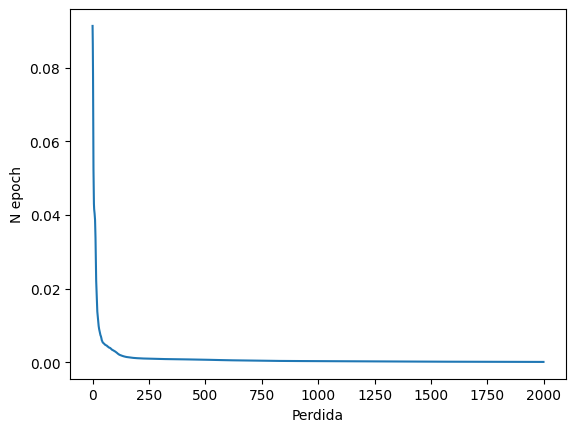

In [13]:
plt.figure()
plt.xlabel('Perdida')
plt.ylabel('N epoch')
plt.plot(loss_list)
plt.show()

### Predicción

In [14]:
y_pred = net(x_train).detach().squeeze(-1)

In [15]:
def plot_result(x, y, z1, z2):
  fig, ax = plt.subplots(1, 2, figsize=(10, 10), subplot_kw={'projection': '3d'})
  #
  ax[0].plot_trisurf(x, y, z1, vmin=y_train.min(), cmap=cm.viridis)
  ax[0].set_xlabel('x')
  ax[0].set_ylabel('y')
  ax[0].set_zlabel('z')
  ax[0].set_title('Superficie')
  #
  ax[1].plot_trisurf(x, y, (z1-z2)**2, vmin=0, cmap=cm.viridis)
  ax[1].set_xlabel('x')
  ax[1].set_ylabel('y')
  ax[1].set_zlabel('z')
  ax[1].set_title('Residuales cuadrados')
  plt.show()

Modifique la llamada de la siguiente función de tal manera que el primer gráfico muestre la superficie luego de la predicción y la segunda superfice la diferencia cuadrática entre predicciones y valores reales

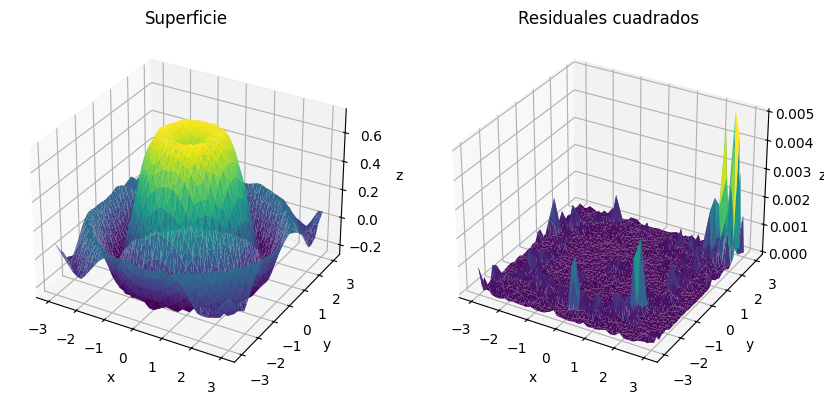

In [16]:
plot_result(x_train[:, 0], x_train[:, 1], y_pred, y_train)

Finalmente, modifique el código para obtener el  error de entrenamiento y el error de prueba. Compare los valores.

In [17]:
print('Error entrenamiento:', net.evaluate(x_train, y_pred))
print('Error de prueba:', net.evaluate(x_train, y_test))

Error entrenamiento: 0.0
Error de prueba: 0.00013030254922341555


### Analizando distintos optimizers

El siguiente segmento de código tarda alrededor de 5 minutos por cada ejecución. Su objetivo es investigar las diferencias entre los 3 optimizadores utilizados y responder las siguientes preguntas:

1. Cuál es el impacto del parámetro `ruido` en el proceso de optimización?
1. Cómo se diferencia el método del descenso del gradiente con el descenso estocástico y las versiones aceleradas?
1. Cómo impacta la dimensión de la red neuronal en el rendimiento del optimizador?
1. Intente analizar la diferencia entre épocas y el tiempo de convergencia de los algoritmos.

NOTA: se modifico el codigo para ser ejecutado como una funcion. Ahora esta funcion recibe parametros que definen como se realizara el entrenamiento.

Originalmente esta funcion entrena con los distintos optimizadores y una lista de batch sizes. Este comportamiento se mantuvo.

Los argumentos que recibe la funcion y que varian el resultado de cada entrenamiento son:

- **n_epochs**: el numero de epocas maximo por entrenamiento
- **ruido**: el ruido del dataset. La funcion tambien genera nuevos datos para poder usar este argumento.
- **net**: la cantidad de neuronas de las capas de la red. El modelo sigue siendo el mismo y solo variamos el numero de neuronas por capas.

Esta funcion retorna 3 valores importantes:

- **times_list**: la lista del tiempo de entrenamiento de cada optimizador.
- **eval_list**: lista de perdida en evaluacion por cada optimizador.
- **loss_meta_list**: lista que tiene listas de la perdida por epoch de entrenamiento, por cada optimizador.

Estos valores retornados son usados luego mas adelante para observar el impacto del cambio de parametros sobre el entrenamiento.

In [18]:
def train_with_args(n_epochs, ruido, net):
  x, y, z, z_ruido = datos(ruido, mesh_dim)
  x_train, y_train, y_test = dataset(x, y, z, z_ruido)

  # Creamos la red con la cantidad de neuronas de los argumentos
  net = Net3L(net[0], net[1], net[2])

  # Creamos una copia de la red de tal manera de que compartan la misma inicialización
  net_list = [copy.deepcopy(net) for i in range(5)]

  # Modifique a conveniencia el número de épocas para responder sus preguntas.
  optim1 = torch.optim.SGD(params=net_list[0].parameters(), lr=0.05)
  optim2 = torch.optim.SGD(params=net_list[1].parameters(), lr=0.1)
  optim3 = torch.optim.SGD(params=net_list[2].parameters(), lr=0.1, momentum=0.9, nesterov= True)
  optim4 = torch.optim.Adam(params=net_list[3].parameters())
  optim5 = torch.optim.LBFGS(params=net_list[4].parameters(), lr=1, max_iter=1, line_search_fn='strong_wolfe')

  optimizer_list = [optim1, optim2, optim3, optim4, optim5]
  batch_sizes_list = [1600, 40, 400, 400, 1600]
  times_list = []
  loss_meta_list = []
  eval_list = []

  for i, optimizer in enumerate(optimizer_list):
      t0 = time.time()
      loss_list = net_list[i].fit(x_train, y_train, optimizer= optimizer, batch_size= batch_sizes_list[i], n_epochs_max= n_epochs)
      t1 = time.time()
      times_list.append(t1-t0)
      loss_meta_list.append(loss_list)
      eval_list.append(net_list[i].evaluate(x_train, y_test))

  return times_list, eval_list, loss_meta_list

La funcion plot crea 3 graficas al ser llamada. Cada una de estas graficas muestra un conjunto de datos por cada uno de los optimizadores. Las distintas graficas son:

- **Efectividad de los distintos optimizadores**: Muestra la perdida (MSE) con los datos de evaluacion con una grafica de barras. Donde cada barra es usando un optimizador distinto
- **Perdida por epocas**: Una grafica de linea donde el eje x son las epocas y el eje y es la perdida en esa epoca. Cada linea representa un modelo que esta siendo entrenado con un optimizador distinto
- **Tiempo de entrenamiento**: Otro grafico de barras que muestra el tiempo que tardamos en entrenar ese modelo con un optimizador dado

Hay que tomar en cuenta que estas graficas pueden variar dependiendo de los argumentos de la funcion de entrenamiento.

In [ ]:

def plot_from_run(current_run):
  names = ["SGD (lr=0.05)", "SGD (lr=0.1)", "SGD (Nesterov)", "Adam", "LBFGS"]

  fig, axes = plt.subplots(1, 3, figsize=(22, 7))

  axes[0].bar(names, current_run['eval'], color='skyblue')
  axes[0].set_xlabel("Optimizadores")
  axes[0].set_ylabel("Evaluation Loss")
  axes[0].set_title("Efectividad de optimizadores (Eval loss)")
  axes[0].tick_params(axis='x', rotation=45)
  axes[0].set_yscale('log')

  colors = plt.cm.get_cmap('tab10', len(current_run['loss']))

  for i, loss_history in enumerate(current_run['loss']):
      axes[1].plot(loss_history, label=names[i], color=colors(i))

  axes[1].set_xlabel("Epoch")
  axes[1].set_ylabel("Training Loss")
  axes[1].set_title("Perdida de entrenamiento sobre epocas para distintos optimizadores")
  axes[1].legend()
  axes[1].set_yscale('log')

  axes[2].bar(names, current_run['times'], color='lightcoral')
  axes[2].set_xlabel("Optimizadores")
  axes[2].set_ylabel("Tiempo de entrenamiento")
  axes[2].set_title("Tiempo de entrenamiento por optimizador")
  axes[2].tick_params(axis='x', rotation=45)

  plt.tight_layout()
  plt.show()

#### Cuál es el impacto del parámetro ruido en el proceso de optimización?

Por cada entrenamiento crearemos un record en este arreglo, en este caso cada entrada del arreglo tendra datos de un entrenamiento con un ruido distinto. La funcion de entrenamiento evalua con cada uno de los distintos optimizadores, asi que obtendremos 3 graficas por cada record.

In [19]:
# arreglo donde guardaremos el resultado de cada corrida
noice_plots = []

In [20]:
times1, eval1, loss_meta1 = train_with_args(500, 0, [50,50,50])
noice_plots.append({
    "times":times1,
    "eval":eval1,
    "loss":loss_meta1
})

In [21]:
times1, eval1, loss_meta1 = train_with_args(500, 0.01, [50,50,50])
noice_plots.append({
    "times":times1,
    "eval":eval1,
    "loss":loss_meta1
})

In [22]:
times1, eval1, loss_meta1 = train_with_args(500, 0.1, [50,50,50])
noice_plots.append({
    "times":times1,
    "eval":eval1,
    "loss":loss_meta1
})

In [23]:
times1, eval1, loss_meta1 = train_with_args(500, 0.5, [50,50,50])
noice_plots.append({
    "times":times1,
    "eval":eval1,
    "loss":loss_meta1
})

En estas graficas cada entrenamiento varia por RUIDO. Donde el ruido de las primeras 3 es 0, luego 0.01, luego 0.1 y finalmente 0.5.

Segun los resultados podemos interpretar lo siguiente:

1 - El tiempo de entrenamiento no se ve afectado por el ruido.

2 - La efectividad de los modelos se ve afectada con un ruido de 0.1 o mayor. La diferencia de efectividad entre optimizadores parece mantenerse igual EXCEPTO en el caso de tener un ruido muy alto (0.5).

3 - El cambio mas notable lo tenemos en la perdida de entrenamiento por batches. Este parece bajar rapido al inicio y mientras menos ruido se tiene parece que es mas dificil lograr bajar la perdida de entrenamiento (a partir de la mitad de los epochs la grafica parece quedarse de forma horizontal mientras el ruido aumenta, es decir que el modelo deja de aprender).

CON RUIDO DE 0


/tmp/ipython-input-18-3177871723.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(current_run['loss'])) # Get a colormap for different lines


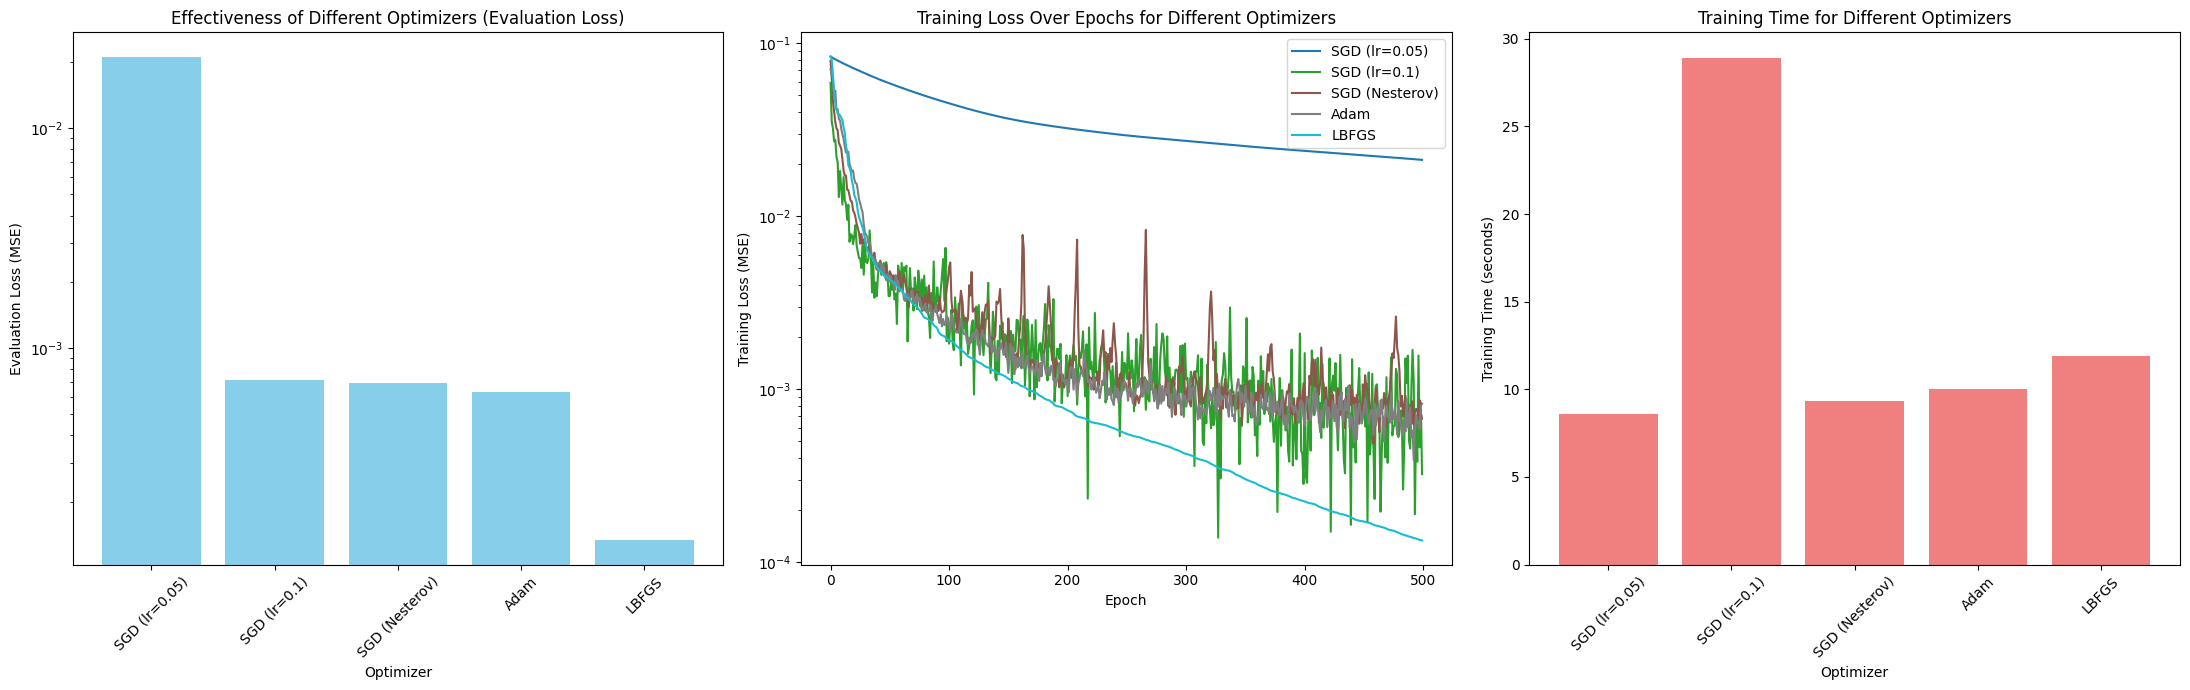

CON RUIDO DE 0.01


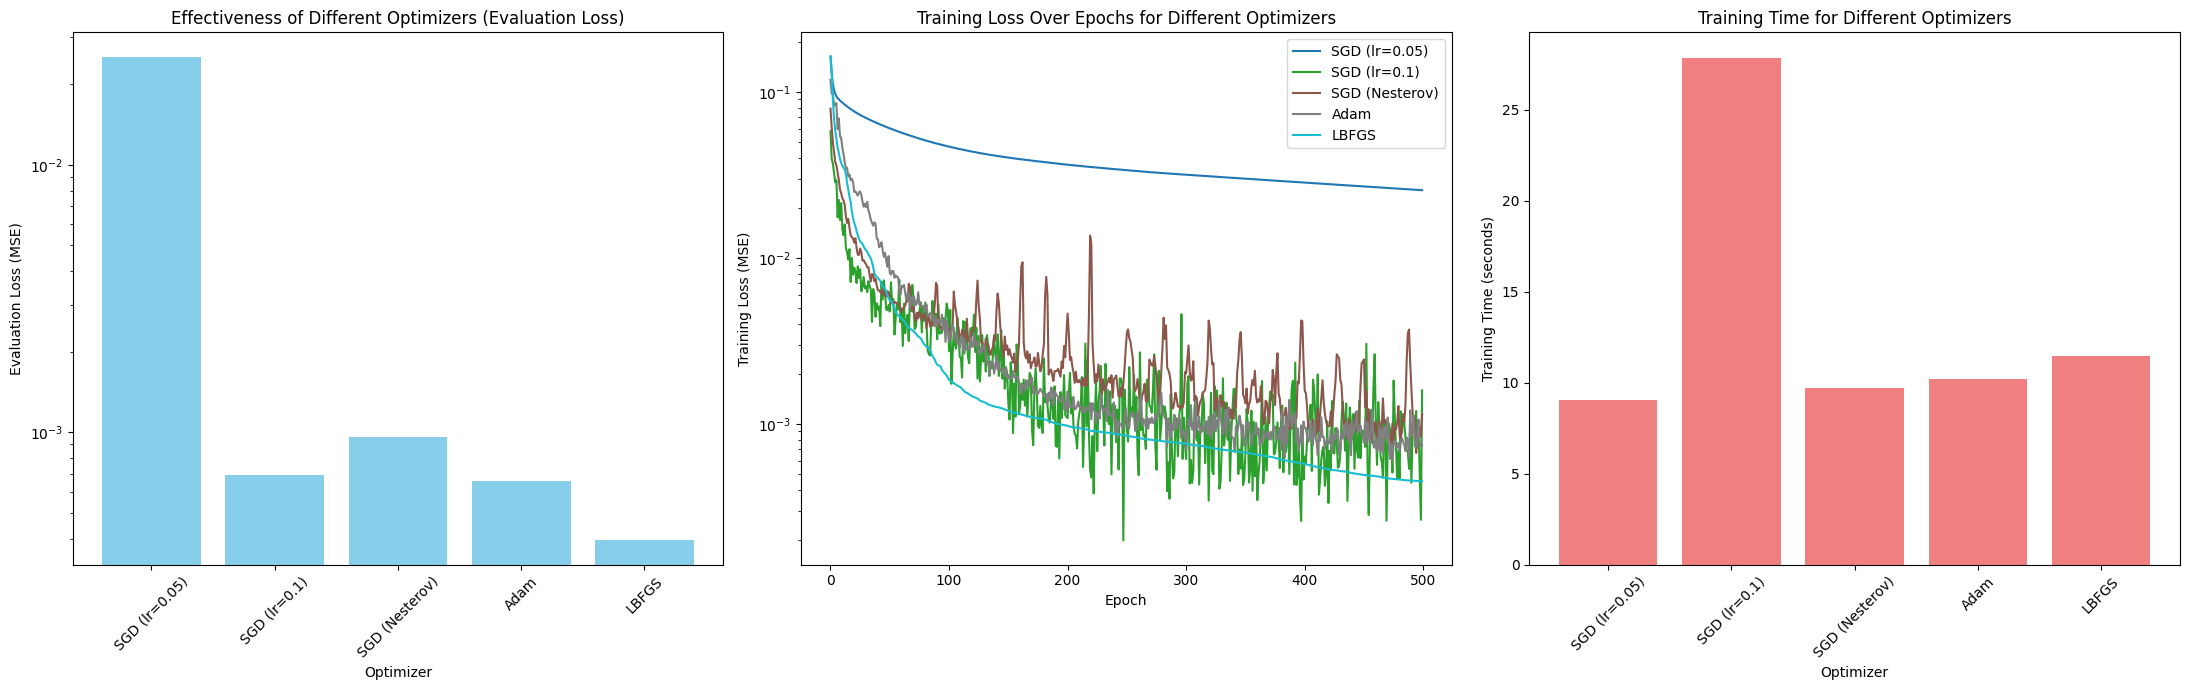

CON RUIDO DE 0.1


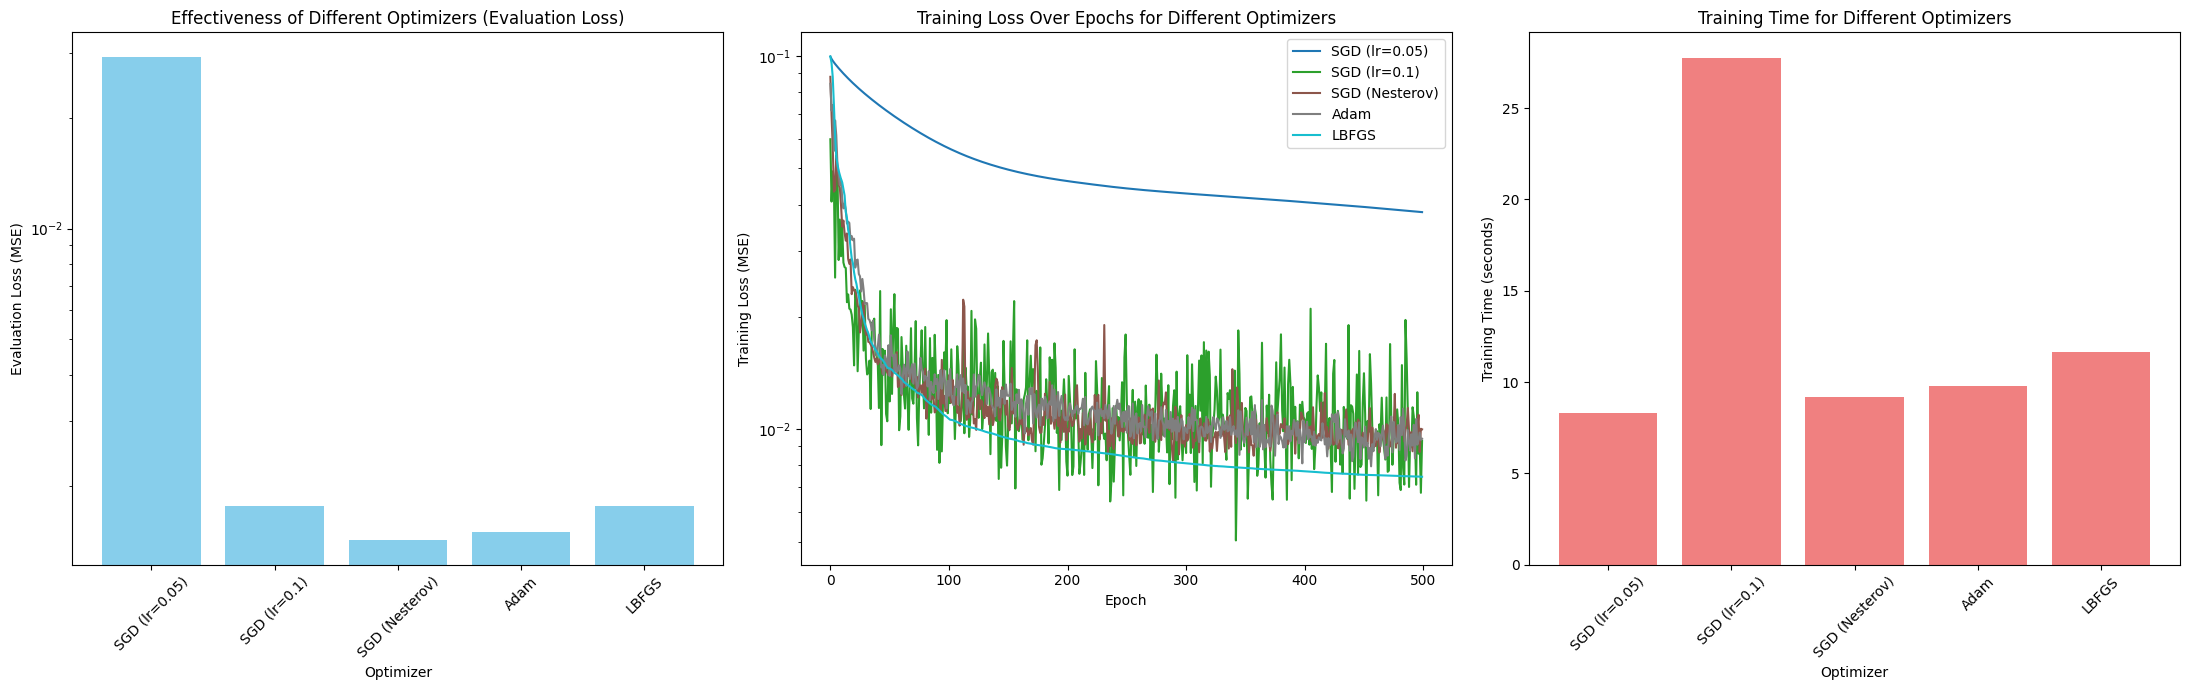

CON RUIDO DE 0.5


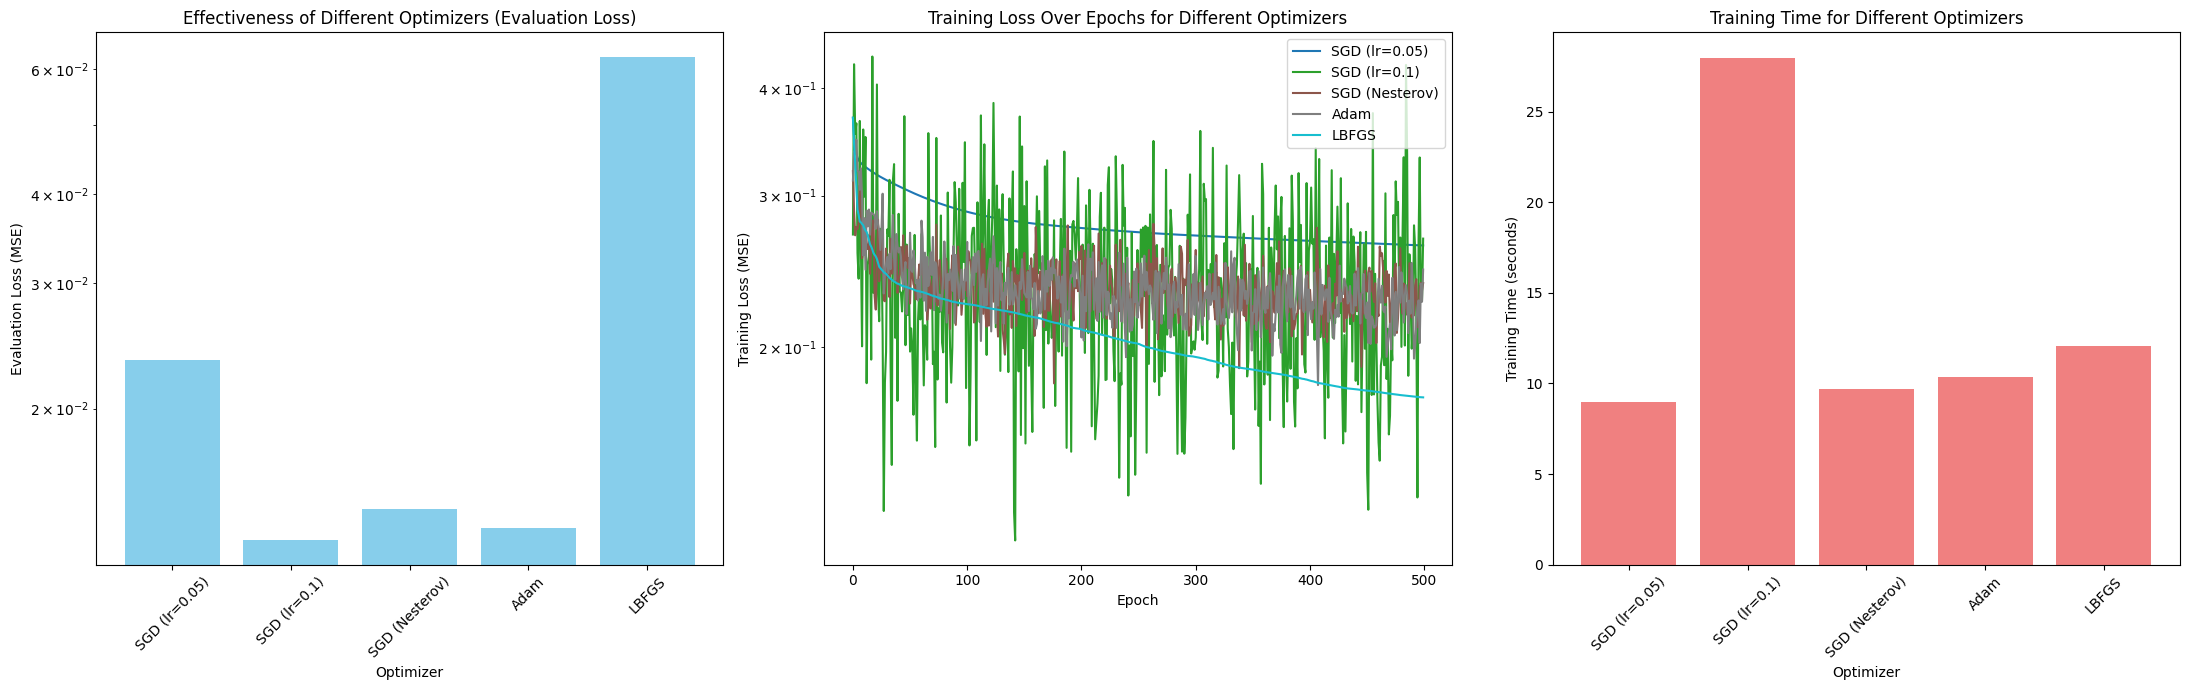

In [36]:
print("CON RUIDO DE 0")
plot_from_run(noice_plots[0])
print("CON RUIDO DE 0.01")
plot_from_run(noice_plots[1])
print("CON RUIDO DE 0.1")
plot_from_run(noice_plots[2])
print("CON RUIDO DE 0.5")
plot_from_run(noice_plots[3])

#### Cómo impacta la dimensión de la red neuronal en el rendimiento del optimizador?

In [25]:
# arreglo donde guardaremos el resultado de cada corrida
nn_plots = []

In [26]:
times1, eval1, loss_meta1 = train_with_args(500, 0, [20,20,20])
nn_plots.append({
    "times":times1,
    "eval":eval1,
    "loss":loss_meta1
})

In [27]:
times1, eval1, loss_meta1 = train_with_args(500, 0, [10,10,10])
nn_plots.append({
    "times":times1,
    "eval":eval1,
    "loss":loss_meta1
})

In [28]:
times1, eval1, loss_meta1 = train_with_args(500, 0, [4,4,4])
nn_plots.append({
    "times":times1,
    "eval":eval1,
    "loss":loss_meta1
})

Las proximas graficas muestran datos de entrenamiento donde variamos la cantidad de neuronas por capa. Las primeras 3 graficas muestran el entrenamiento con 20 neuronas por capa, las siguientes 3 con 10 y las ultimas 3 con 4 neuronas por capa.

La interpretacion de resultados es la siguiente:

- Respecto al tiempo de entrenamiento, este parece no variar por la cantidad de neuronas.
- La perdida en evaluacion parece incrementar independientemente del optimizador usado. Las diferencias entre optimizadores seran discutidas mas adelante.
- Respecto a la perdida por epocas: A mayor la cantidad de neuronas, mayor es la velocidad de aprendizaje del modelo respecto a las epocas. Para la menor cantidad de neuronas los modelos parecen no llegar a una perdida menor a $10^{-3}$. En resumen parecen aprender menos del dataset y obtener menos informacion por epoca.

/tmp/ipython-input-18-3177871723.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(current_run['loss'])) # Get a colormap for different lines


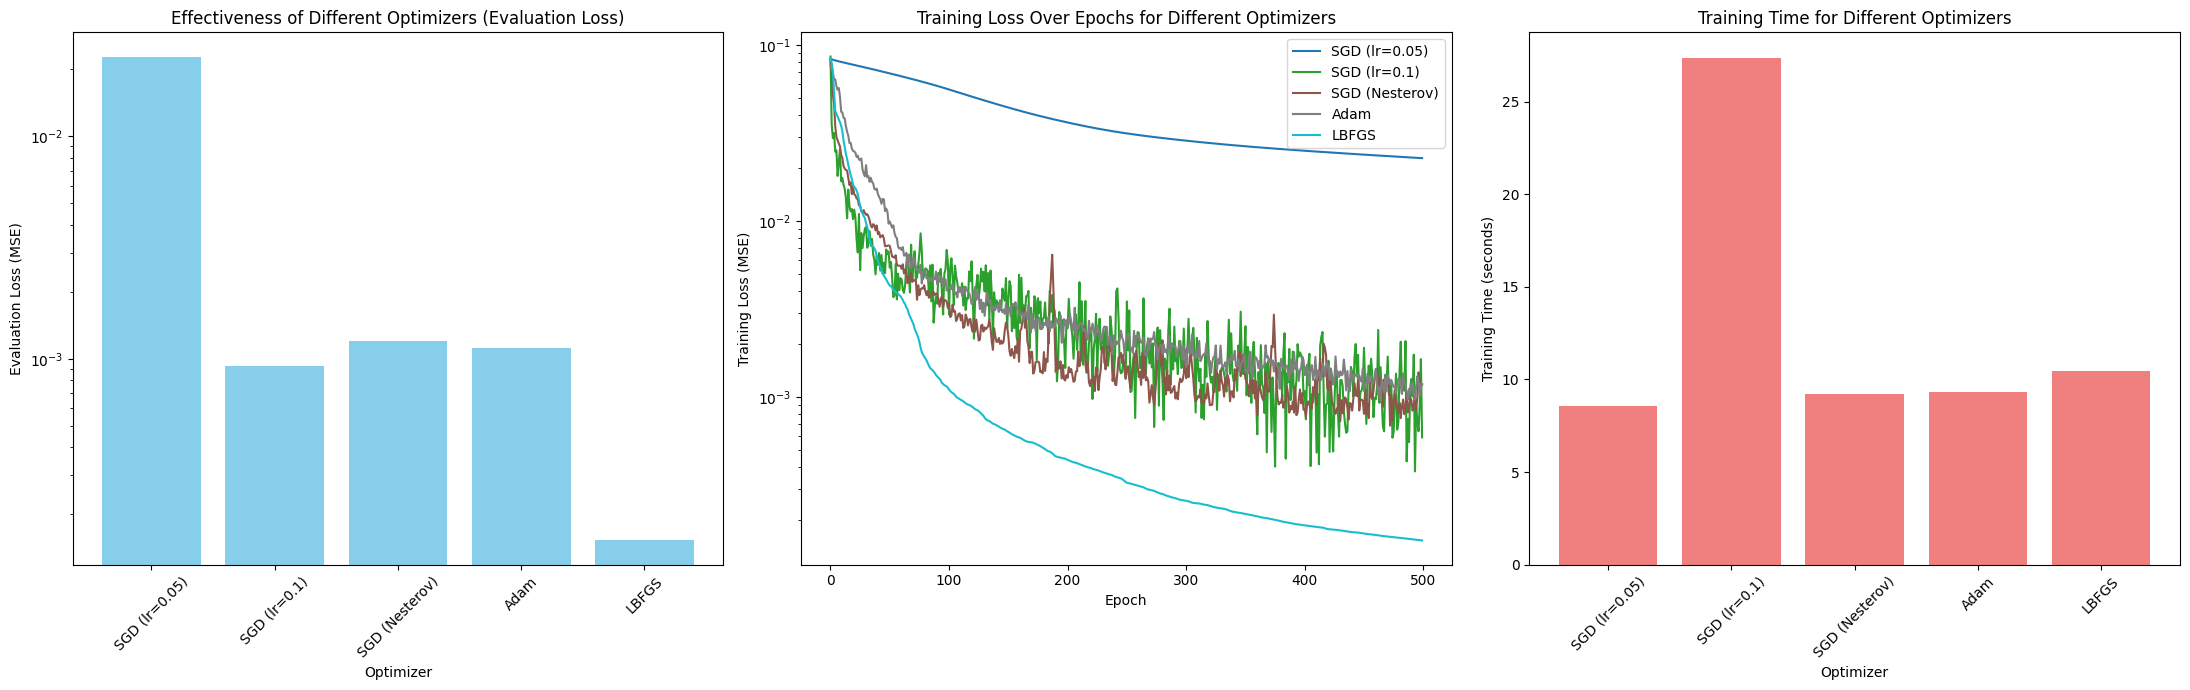

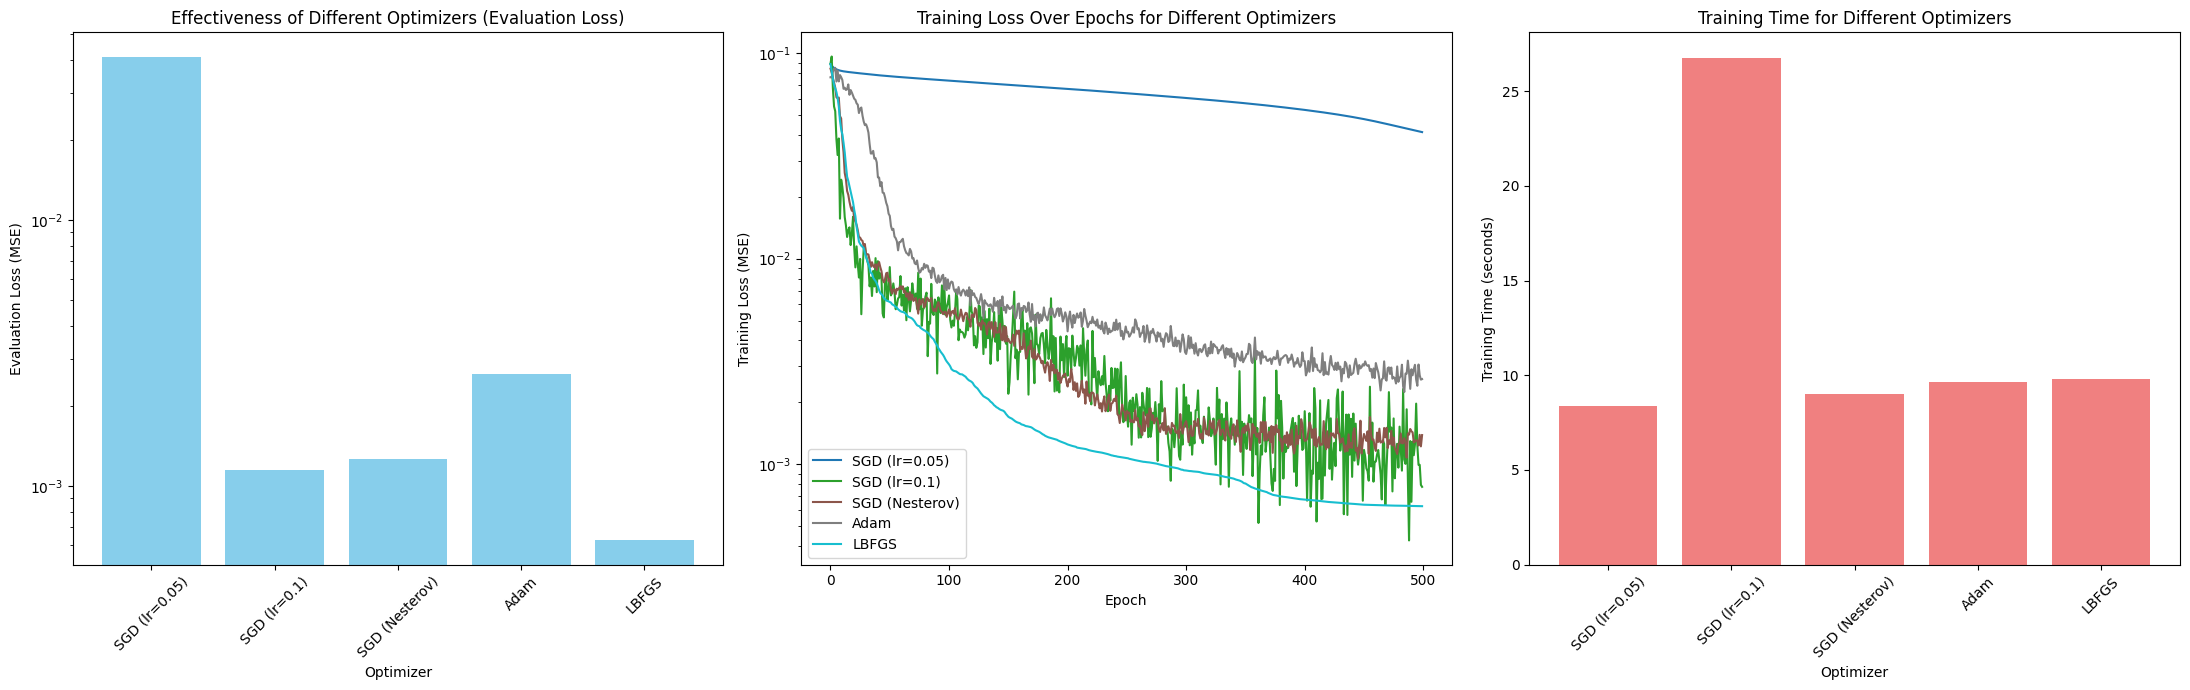

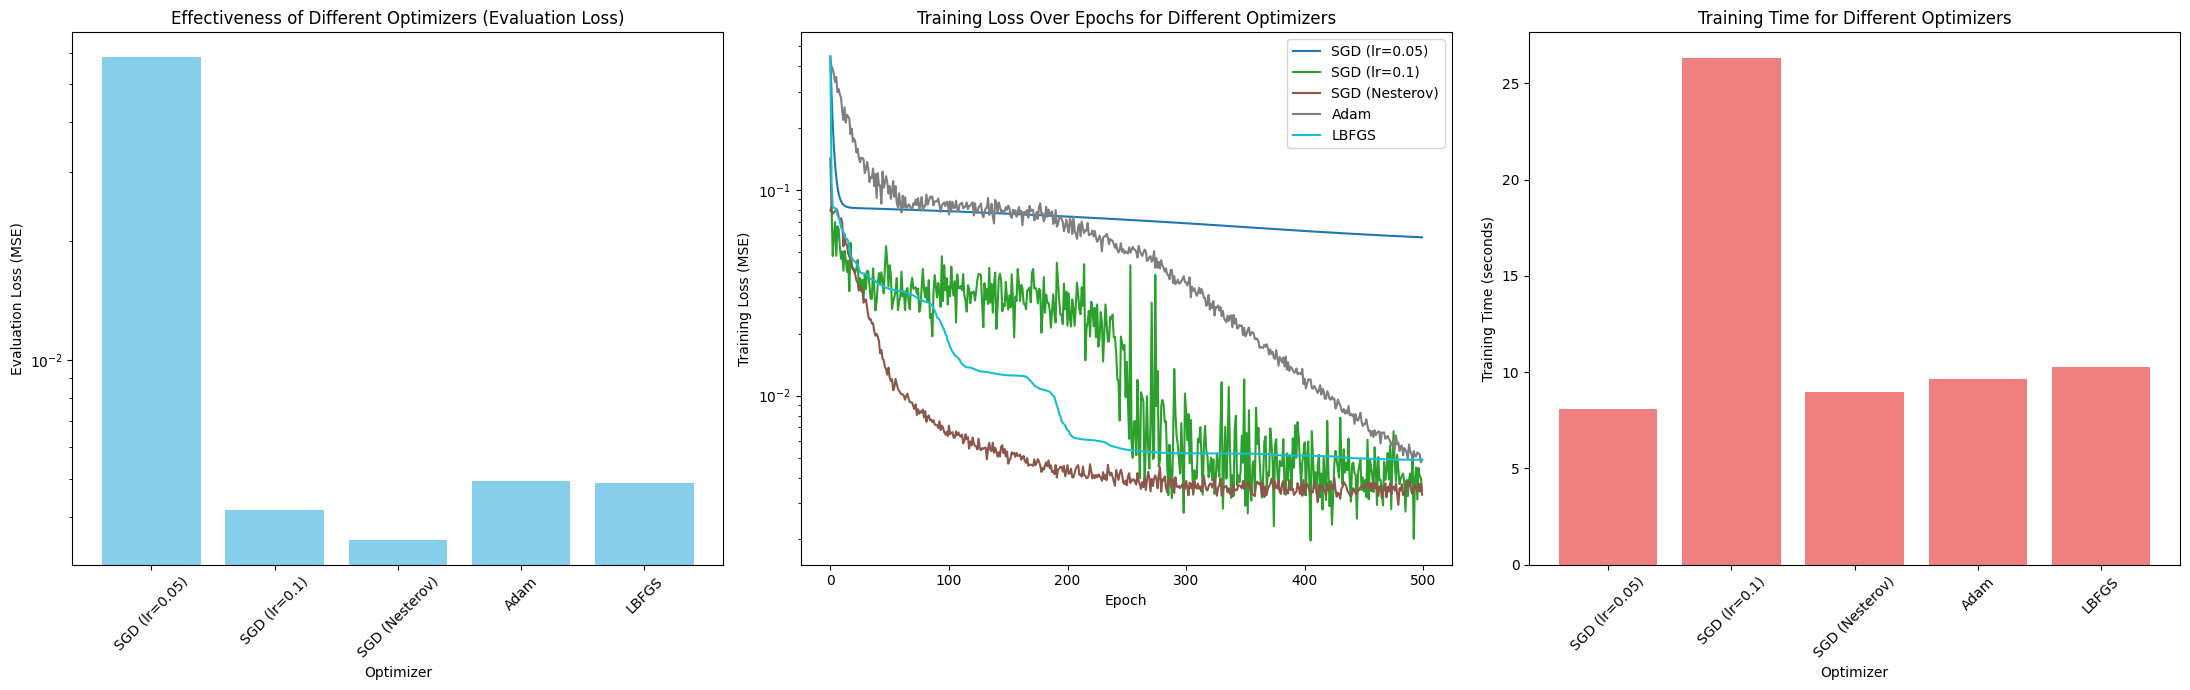

In [29]:
plot_from_run(nn_plots[0])
plot_from_run(nn_plots[1])
plot_from_run(nn_plots[2])

#### Intente analizar la diferencia entre épocas y el tiempo de convergencia de los algoritmos.

In [30]:
# arreglo donde guardaremos el resultado de cada corrida
epochs_plots = []

In [31]:
times1, eval1, loss_meta1 = train_with_args(200, 0, [20,20,20])
epochs_plots.append({
    "times":times1,
    "eval":eval1,
    "loss":loss_meta1
})

In [32]:
times1, eval1, loss_meta1 = train_with_args(800, 0, [20,20,20])
epochs_plots.append({
    "times":times1,
    "eval":eval1,
    "loss":loss_meta1
})

In [33]:
times1, eval1, loss_meta1 = train_with_args(1200, 0, [20,20,20])
epochs_plots.append({
    "times":times1,
    "eval":eval1,
    "loss":loss_meta1
})

In [34]:
times1, eval1, loss_meta1 = train_with_args(2200, 0, [20,20,20])
epochs_plots.append({
    "times":times1,
    "eval":eval1,
    "loss":loss_meta1
})

Para los siguientes graficos tenemos un cambio en numero de epocas por grafico: 200, 800, 1200, 2200.

Respecto al tiempo, parece afectar directamente al mismo. El tiempo de entrenamiento incrementa proporcionalmente para todos los optimizadores. El resto de resultados no parece cambiar signficativamente a excepcion del hecho de que el modelo al final del entrenamiento aprende mas. Es decir que al finalizar, la perdida de validacion final es menor a mayor numero de epocas maximas.

/tmp/ipython-input-18-3177871723.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(current_run['loss'])) # Get a colormap for different lines


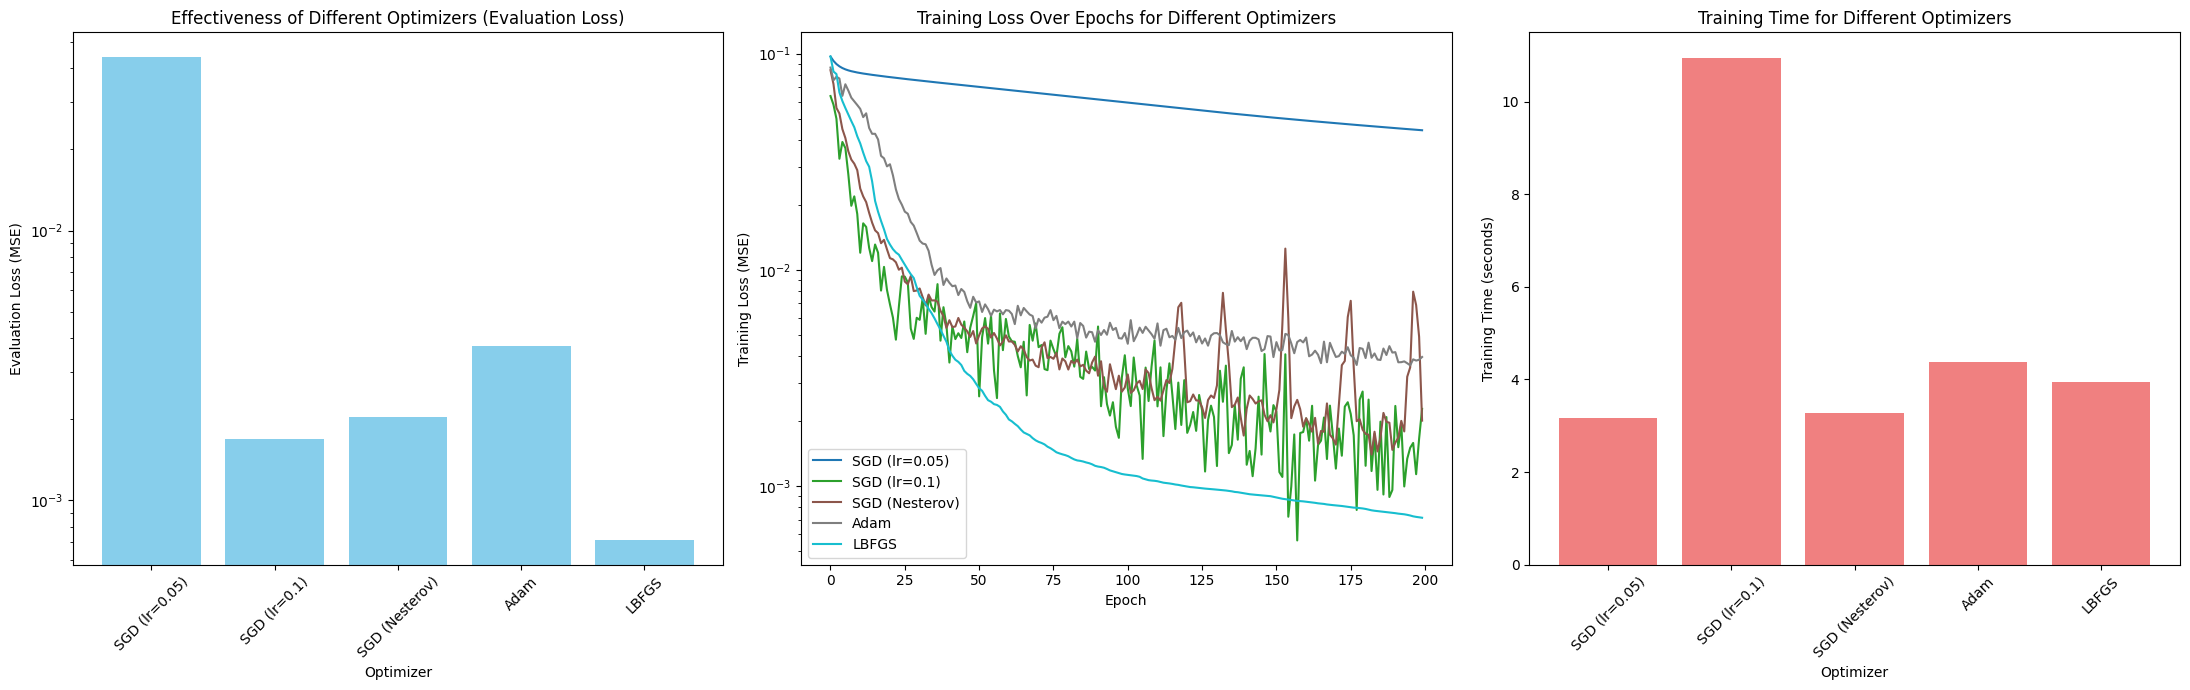

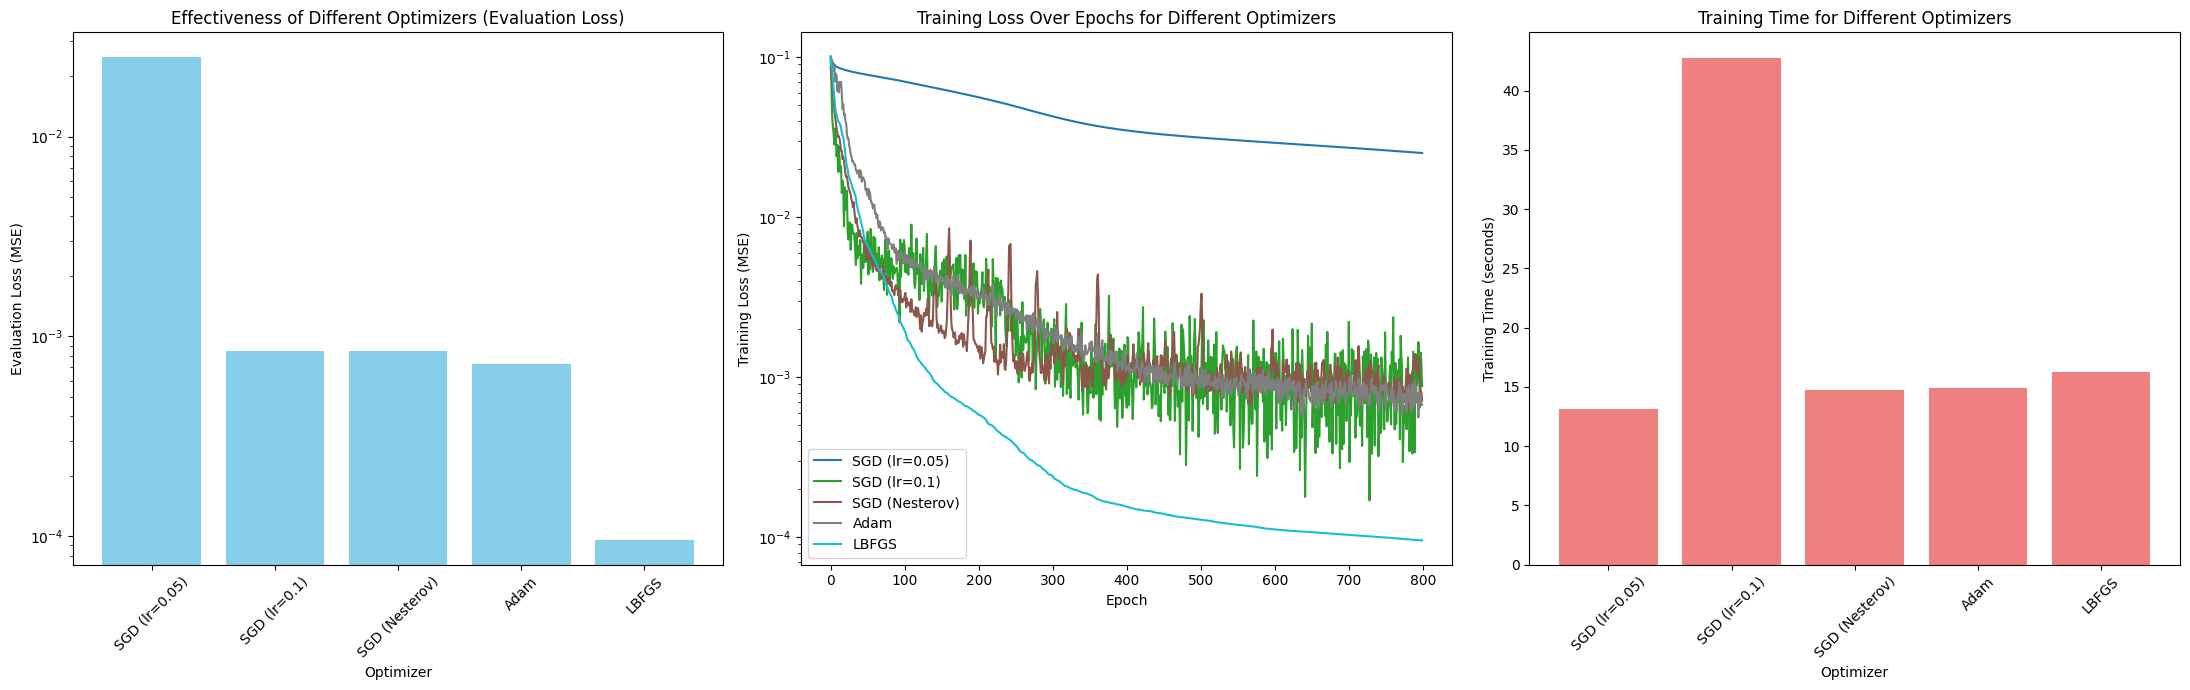

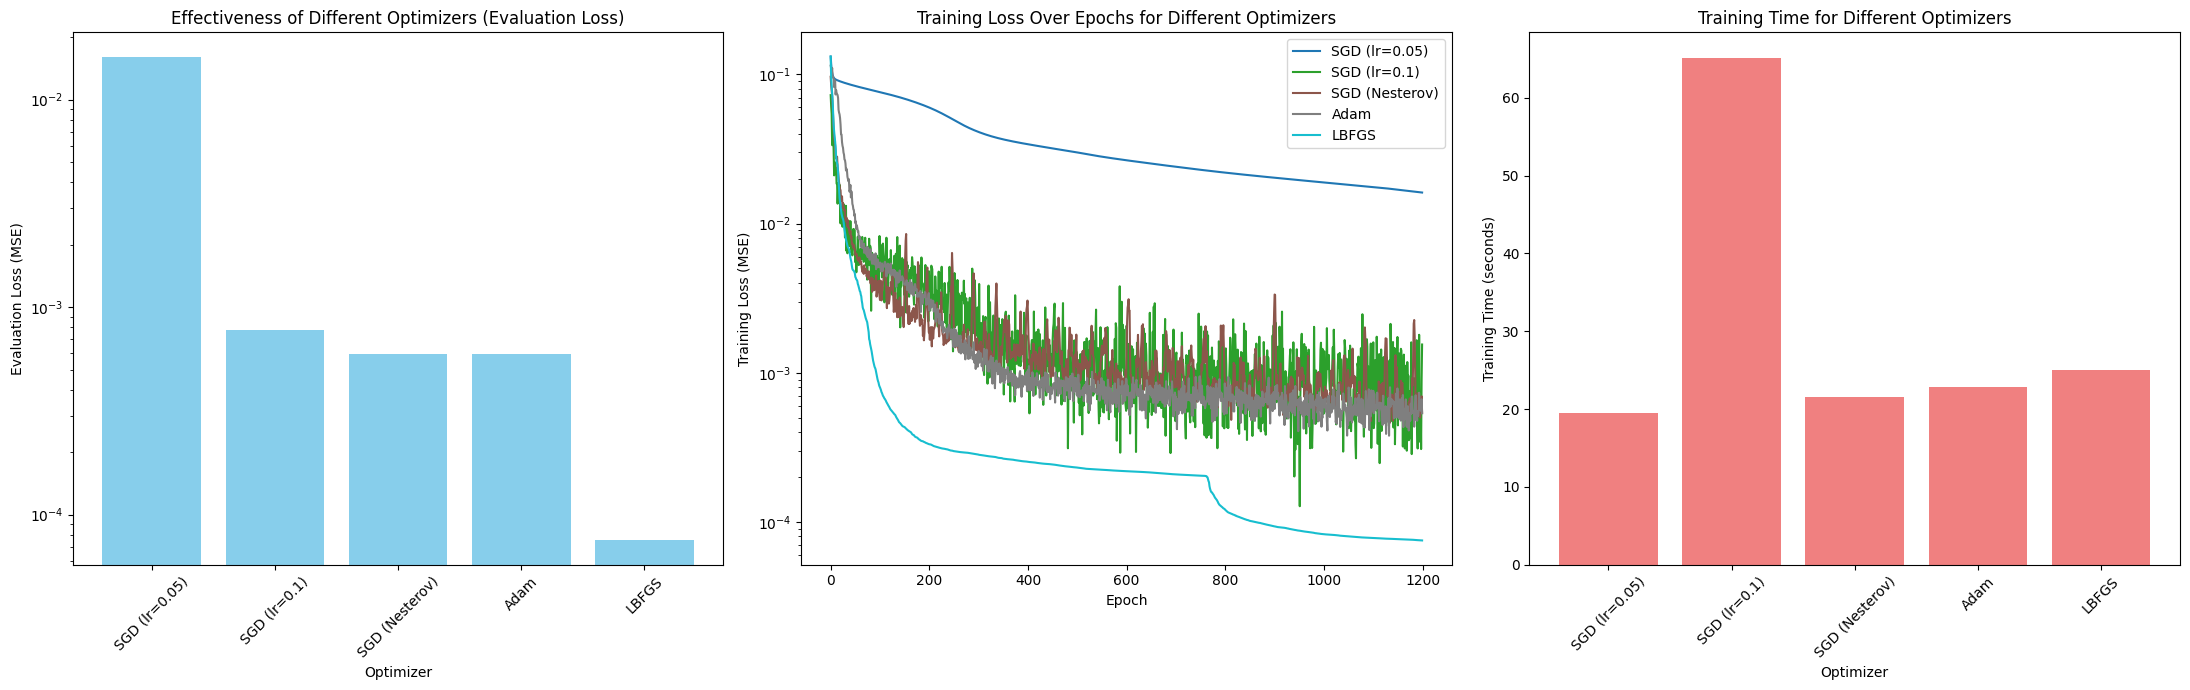

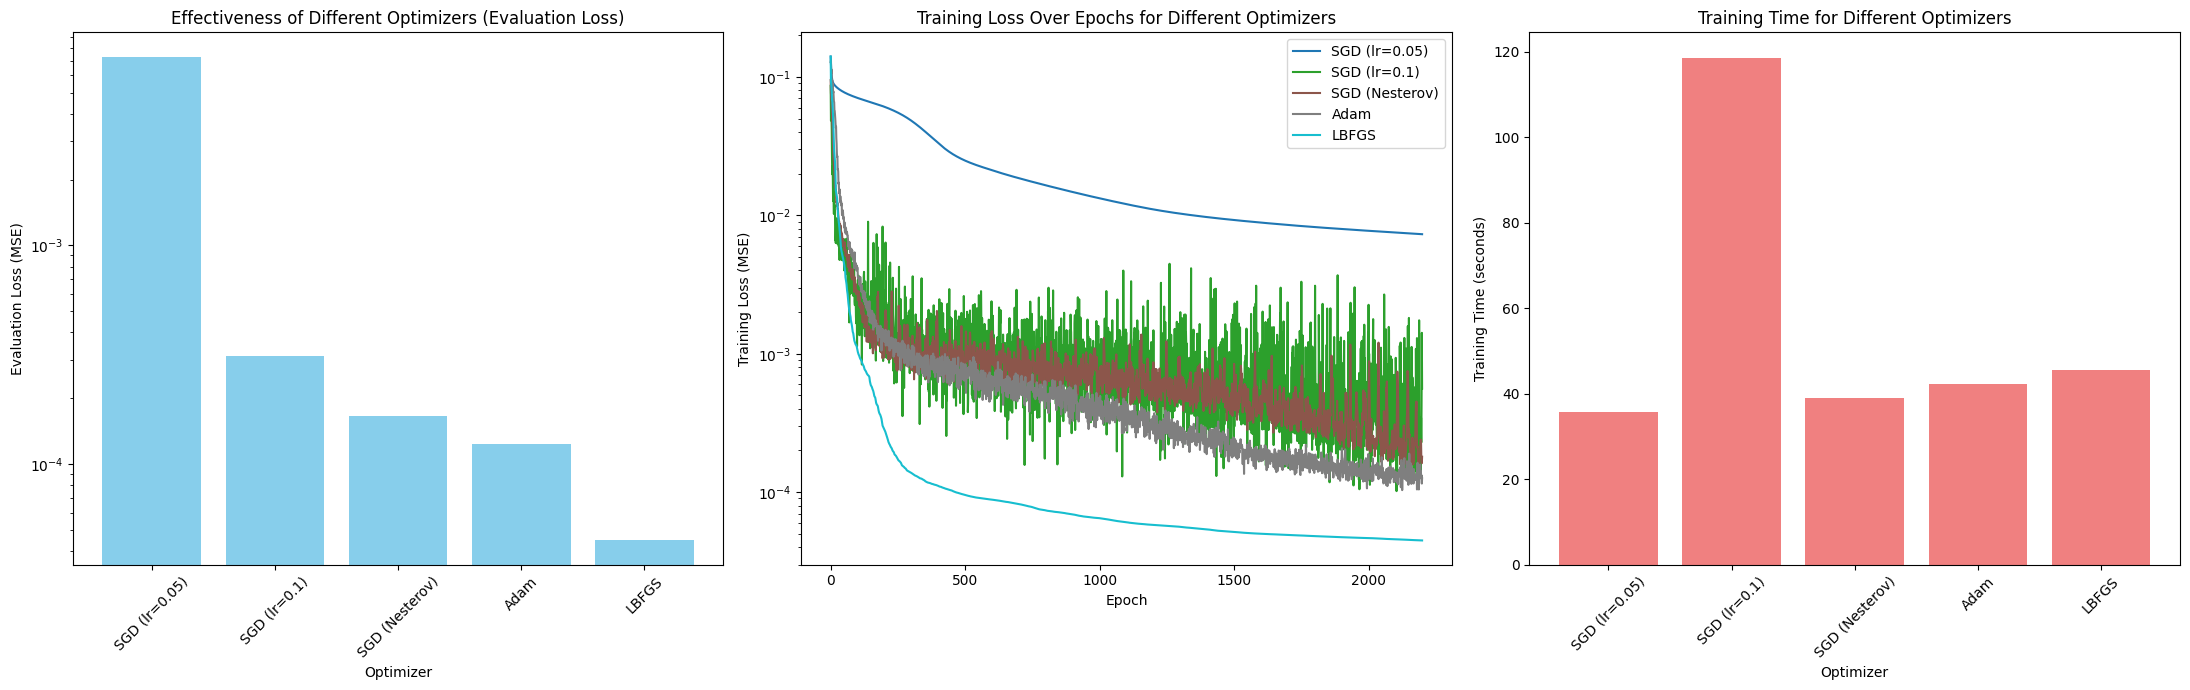

In [35]:
plot_from_run(epochs_plots[0])
plot_from_run(epochs_plots[1])
plot_from_run(epochs_plots[2])
plot_from_run(epochs_plots[3])

#### Cómo se diferencia el método del descenso del gradiente con el descenso estocástico y las versiones aceleradas?

Para responder esta pregunta no es necesario mostrar mas graficas. Ya arriba tenemos informacion suficiente para comparar efectivamente los distintos optimizadores.

Una de las diferencias mas evidentes es la estabilidad de entrenamiento. Varios de los optimizadores parecen variar mucho la perdida por cada epoca, mientras que otros no la varian mucho. Desde el menos estable al mas estable tenemos el siguiente orden:

1 - SGD(lr=-0.1)

2 - SGD (Nesterov)

3 - Adam

4 - LBFGS

5 - SGD (lr=0.05)

Cuando se trata de que optimizador logra minimizar mejor el error de prediccion tendriamos que LBFGS es el mejor de todos. Y el peor seria SGD (lr=0.05).

Respecto al tiempo de convergencia, este es similar para la mayoria de optimizadores con excepcion de SGD(lr=-0.1), que es mucho mas lento que el resto.

